 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("C:/Users/avign/Desktop/cu-nyc-fin-pt-09-2020-u-c/Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv,index_col="Date", parse_dates=True)
whale_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df.dropna(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("C:/Users/avign/Desktop/cu-nyc-fin-pt-09-2020-u-c/Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
# YOUR CODE HERE

algo_returns_df = pd.read_csv(algo_returns_csv,index_col="Date", parse_dates=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df.dropna(inplace=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("C:/Users/avign/Desktop/cu-nyc-fin-pt-09-2020-u-c/Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")
# YOUR CODE HERE
  
sp500_history_df = pd.read_csv(sp500_history_csv,index_col="Date", parse_dates=True)
sp500_history_df.head()                         

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace('$','')


In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns = sp500_history_df.astype(float).pct_change()
sp500_daily_returns.sort_index()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns.dropna(inplace=True)

In [13]:
# Rename Column
# YOUR CODE HERE
sp500_daily_returns = sp500_daily_returns.rename(columns={
    "Close": "S&P 500",})
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:xlabel='Date'>

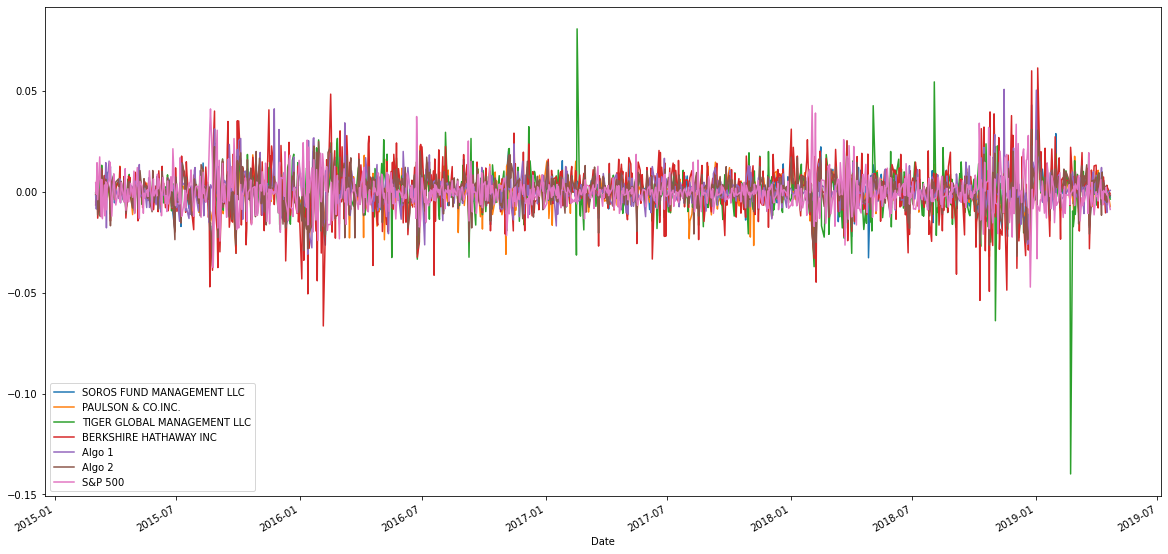

In [15]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

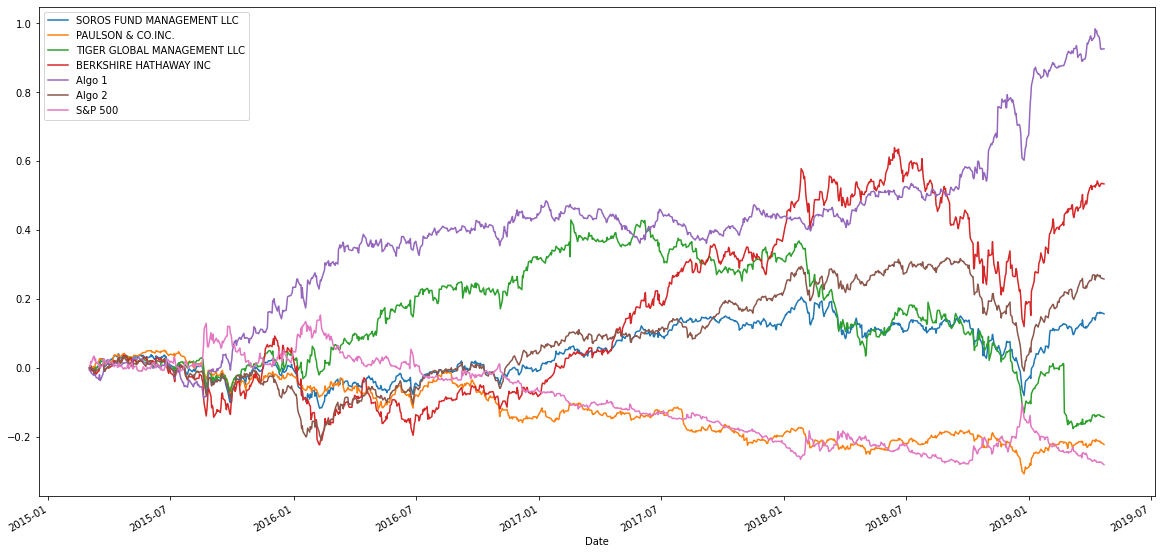

In [16]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod() -1
cumulative_returns.plot(figsize = (20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

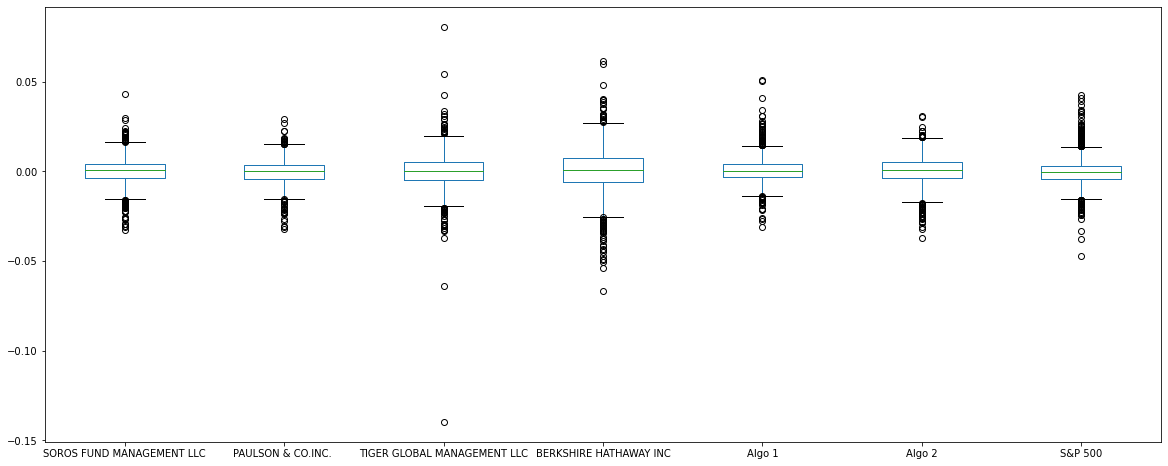

In [17]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_df.plot.box(figsize=(20,8))


In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

std_dev=combined_df.std()
std_dev.sort_index(ascending=True)
print(std_dev)


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64


In [19]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
riskier_stocks = std_dev[std_dev > std_dev["S&P 500"]]
print(riskier_stocks)


TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


In [20]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annual_std_dev = std_dev * np.sqrt(252)
annual_std_dev

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:xlabel='Date'>

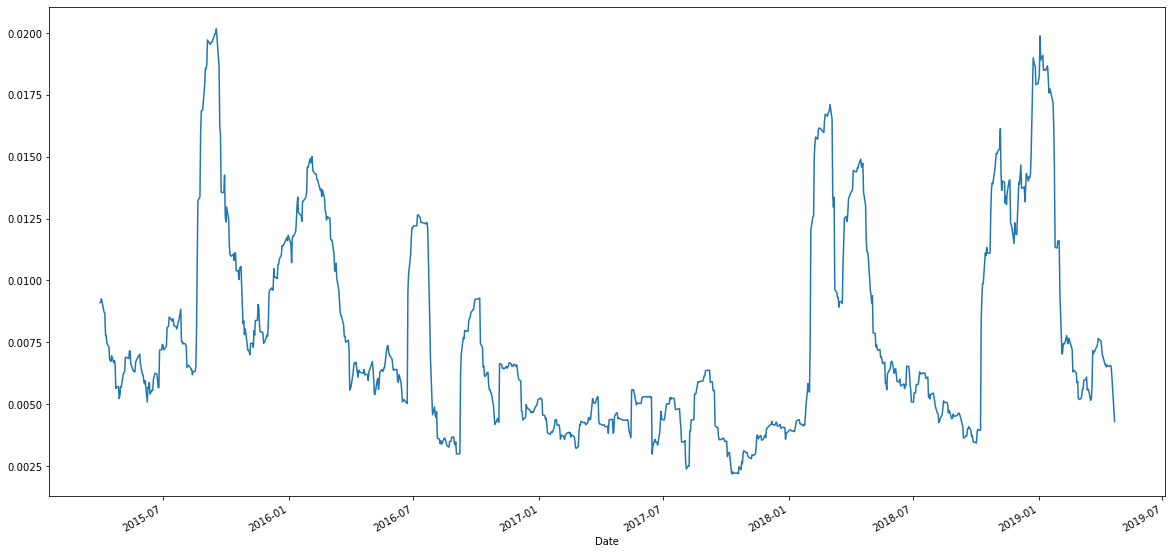

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_df["S&P 500"].rolling(window=21).std().plot(figsize=(20,10))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


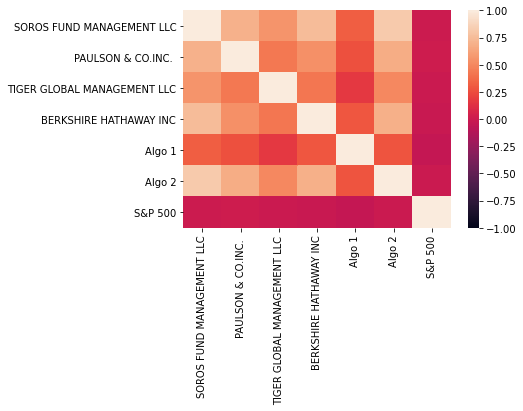

In [22]:
# Construct a correlation table
# YOUR CODE HERE
import seaborn as sns
correlation_table = combined_df.corr()
sns.heatmap(correlation_table, vmin=-1, vmax=1)
correlation_table

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
covariance_soros = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['S&P 500'])
variance_sp500 = combined_df['S&P 500'].var()
beta_soros = covariance_soros/variance_sp500
print(beta_soros)


0.0005275302230855206


<AxesSubplot:title={'center':'Rolling 30-Day Beta of Soros'}, xlabel='Date'>

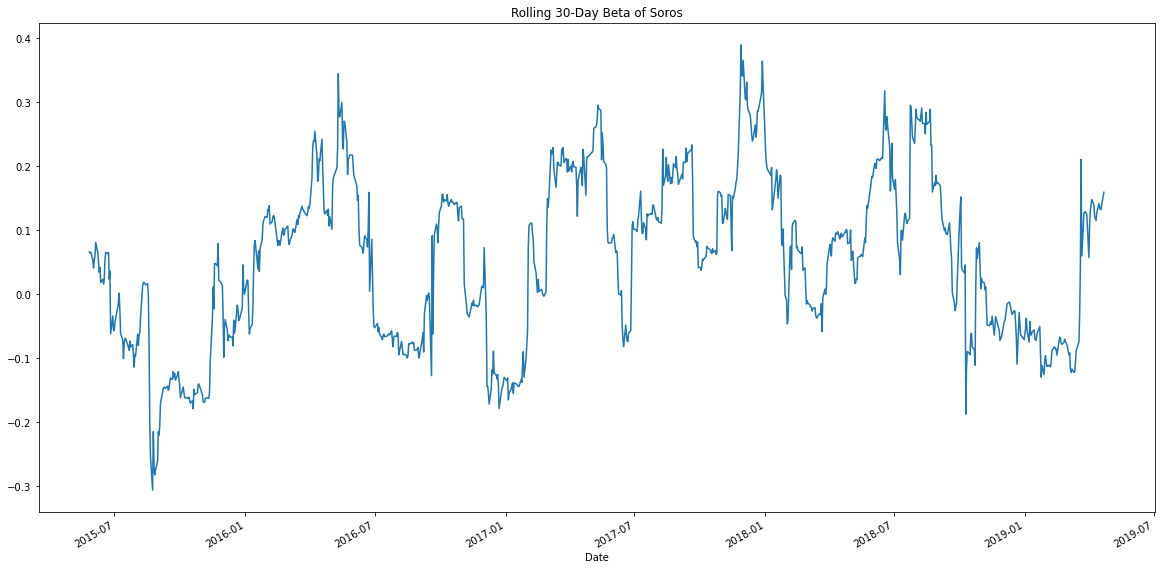

In [24]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
rolling_covariance_soros = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_variance_sp500 = combined_df['S&P 500'].rolling(window=60).var()
rolling_beta_soros = rolling_covariance_soros / rolling_variance_sp500
rolling_beta_soros.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Soros')

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [25]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios_df = (combined_df.mean()* 252) /(combined_df.std()*np.sqrt(252))
sharpe_ratios_df

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:>

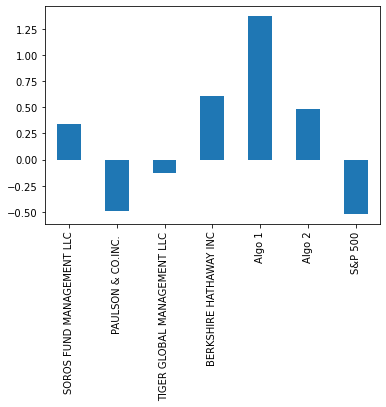

In [26]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios_df.plot.bar()

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

Yes. The sharpe ratio measures the performance of an investement compared to a risk-free investement after adjusting for risk. Based off our calculations visuaized in the above bar graph, both algo strategies outperform the market, and algo 1 has the highest sharpe ratio of all the assets in our portfolio, while our algo 2 strategy returns the third highest sharpe ratio, meaning they both perform comparatively better then the other assets (with the exception of Berkshire Hathaway which outperforms algo 2).

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
# YOUR CODE HERE

mcd_stock_path = Path("C:/Users/avign/Desktop/cu-nyc-fin-pt-09-2020-u-c/Homework/04-Pandas/Instructions/Starter_Code/Resources/mcd_historical.csv")
mcd_stock_df = pd.read_csv(mcd_stock_path, index_col="Date", parse_dates=True)
mcd_stock_df.head()

,Close
Date,
2018-05-09,164.24
2018-05-10,165.07
2018-05-11,165.39
2018-05-14,164.72
2018-05-15,163.06


In [28]:
# Read the second stock
# YOUR CODE HERE
fb_stock_path = Path("C:/Users/avign/Desktop/cu-nyc-fin-pt-09-2020-u-c/Homework/04-Pandas/Instructions/Starter_Code/Resources/fb_historical.csv")
fb_stock_df = pd.read_csv(fb_stock_path, index_col="Date", parse_dates=True)
fb_stock_df.head()

,Close
Date,
2018-05-09,182.66
2018-05-10,185.53
2018-05-11,186.99
2018-05-14,186.64
2018-05-15,184.32


In [29]:
# Read the third stock
# YOUR CODE HERE
ko_stock_path = Path("C:/Users/avign/Desktop/cu-nyc-fin-pt-09-2020-u-c/Homework/04-Pandas/Instructions/Starter_Code/Resources/ko_historical.csv")
ko_stock_df = pd.read_csv(ko_stock_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
ko_stock_df.head()

,Close
Date,
2018-05-09,41.78
2018-05-10,42.18
2018-05-11,42.14
2018-05-14,42.04
2018-05-15,41.72


In [30]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
combined_df_2 = pd.concat([mcd_stock_df,fb_stock_df,ko_stock_df], axis='columns', join='inner')
combined_df_2.head()

,Close,Close,Close
Date,,,
2018-05-09,164.24,182.66,41.78
2018-05-10,165.07,185.53,42.18
2018-05-11,165.39,186.99,42.14
2018-05-14,164.72,186.64,42.04
2018-05-15,163.06,184.32,41.72


In [31]:
# Reset the index
# YOUR CODE HERE
#combined_df_2.index = combined_df_2.index.date

In [32]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
columns = ["MCD", "FB", "KO"]
combined_df_2.columns = columns
combined_df_2.dropna()
combined_df_2.head()

,MCD,FB,KO
Date,,,
2018-05-09,164.24,182.66,41.78
2018-05-10,165.07,185.53,42.18
2018-05-11,165.39,186.99,42.14
2018-05-14,164.72,186.64,42.04
2018-05-15,163.06,184.32,41.72


In [33]:
#Calculate Daily Returns 

daily_returns_df_2 = combined_df_2.pct_change()
daily_returns_df_2.head()

,MCD,FB,KO
Date,,,
2018-05-09,NaN,NaN,NaN
2018-05-10,0.005054,0.015712,0.009574
2018-05-11,0.001939,0.007869,-0.000948
2018-05-14,-0.004051,-0.001872,-0.002373
2018-05-15,-0.010078,-0.012430,-0.007612


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
returns_of_portfolio = daily_returns_df_2.dot(weights)

returns_of_portfolio_df = pd.DataFrame(returns_of_portfolio)
returns_of_portfolio_df.head()


,0
Date,
2018-05-09,NaN
2018-05-10,0.010113
2018-05-11,0.002953
2018-05-14,-0.002765
2018-05-15,-0.010040


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
combined_df_3 = pd.concat([returns_of_portfolio_df, combined_df], axis='columns', join='outer')
combined_df_3.rename(columns= {0: "Custom Portfolio"},inplace = True )
combined_df_3.head(10000)

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2015-03-03,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,NaN,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,NaN,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,NaN,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,NaN,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...,...
2019-05-02,-0.001480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-03,0.012348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-06,-0.002093,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
combined_df_3.dropna(inplace=True)
combined_df_3.sort_index()
combined_df_3.head()

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-05-10,0.010113,0.009723,0.010401,0.009594,0.004005,0.006755,0.001454,-0.001705
2018-05-11,0.002953,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883
2018-05-14,-0.002765,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010040,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,-0.003772,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [44]:
# Risk
# YOUR CODE HERE
std_dev_2=combined_df_3.std()
annual_std_dev_2 = std_dev_2 * np.sqrt(252)
annual_std_dev_2


Custom Portfolio               0.160029
SOROS FUND MANAGEMENT LLC      0.146607
PAULSON & CO.INC.              0.116918
TIGER GLOBAL MANAGEMENT LLC    0.232197
BERKSHIRE HATHAWAY INC         0.246331
Algo 1                         0.133492
Algo 2                         0.138918
S&P 500                        0.151832
dtype: float64

<AxesSubplot:xlabel='Date'>

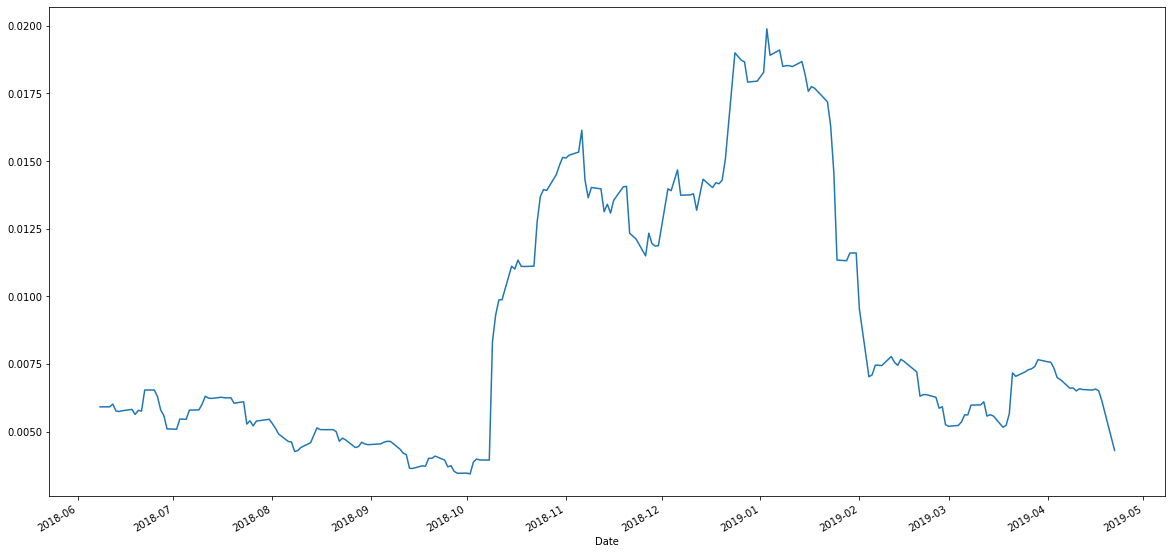

In [38]:
# Rolling
# YOUR CODE HERE
combined_df_3["S&P 500"].rolling(window=21).std().plot(figsize=(20,10))

In [39]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios_df_2 = (combined_df_3.mean()* 252) /(combined_df_3.std()*np.sqrt(252))
sharpe_ratios_df_2

Custom Portfolio               0.838713
SOROS FUND MANAGEMENT LLC      0.413493
PAULSON & CO.INC.              0.328773
TIGER GLOBAL MANAGEMENT LLC   -1.005147
BERKSHIRE HATHAWAY INC         0.102028
Algo 1                         2.047336
Algo 2                         0.020529
S&P 500                       -0.443903
dtype: float64

<AxesSubplot:>

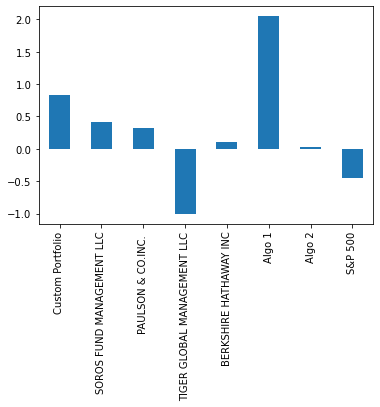

In [40]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios_df_2.plot.bar()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


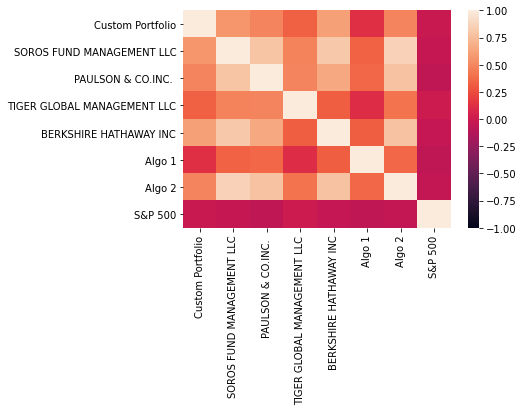

In [41]:
# Create a correlation analysis
# YOUR CODE HERE
correlation_table_2 = combined_df_3.corr()
sns.heatmap(correlation_table_2, vmin=-1, vmax=1)
correlation_table

In [42]:
# Beta
# YOUR CODE HERE
covariance_custom_portfolio = combined_df_3['Custom Portfolio'].cov(combined_df_3['S&P 500'])
variance_sp500 = combined_df_3['S&P 500'].var()
beta_custom_portfolio = covariance_custom_portfolio/variance_sp500
print(beta_custom_portfolio)


-0.015280687938880792
